In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

In [53]:
#off diagonal/diagonal four point/two electron correlations $c^{\dagger}_{1}c^{\dagger}_{2}c_{3}c_{4}$
wOD=np.zeros(8)
wD=np.zeros(8)
for i in range(8):
    Psi=open("KondoWvFn%s.txt"%(i),"+r").readlines()
    N=13
    Ket=np.array([np.array([conf[:N],conf[N:]]) for conf in Psi[2:]])
    Psi=np.rec.fromarrays([Ket[:,0],Ket[:,1].astype(np.float64)],names='keys,vals')
    for conf in Psi:
        if (conf['keys'][0:3]=='001'):
            string='110'+conf['keys'][3:] 
            wOD[i]=wOD[i]+conf['vals']*Psi['vals'][np.where(Psi['keys']==string)]
        if (conf['keys'][0:3]=='001'):
            wD[i]=wD[i]+conf['vals']**2   
  
                    

In [54]:
wD,wOD

(array([0.25      , 0.0718677 , 0.01416183, 0.04089117, 0.02132644,
        0.0356488 , 0.02482657, 0.03202696]),
 array([-0.25      , -0.21280063, -0.04193326, -0.06379513, -0.03327181,
        -0.04594392, -0.03199631, -0.03850995]))

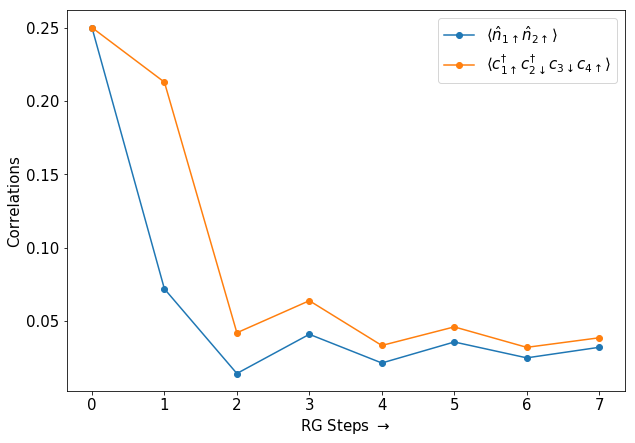

In [63]:
figure,ax=plt.subplots(1,1)
plt.rcParams["figure.figsize"] = (10,7)
ax.set_xlabel(r'RG Steps $\rightarrow$',fontsize=15)
ax.set_ylabel(r'Correlations',fontsize=15)
ax.plot(wD,label=r'$\langle \hat{n}_{1\uparrow}\hat{n}_{2\uparrow}\rangle$',marker='o')
ax.plot(np.abs(wOD),label=r'$\langle c^{\dagger}_{1\uparrow}c^{\dagger}_{2\downarrow}c_{3\downarrow}c_{4\uparrow}\rangle$',marker='o')
ax.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.savefig('corrKondo.png')